In [258]:
# Import packages
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from statistics import mean

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [259]:
# Generate Dataframe
df_test = pd.read_csv("reddit-pop-dataset/test.csv")
df_train = pd.read_csv("reddit-pop-dataset/train.csv")

In [260]:
display(df_test.head(), df_train.head())

,score_hidden,name,link_id,body,downs,created_utc,score,author,distinguished,id,...,parent_id,subreddit,author_flair_css_class,author_flair_text,gilded,retrieved_on,ups,controversiality,subreddit_id,edited
0,False,t1_cnatx2q,t3_2qx8l6,Yeah his really deliberate hot dog strategy wa...,0,1420074237,7,classlessjerk,NaN,cnatx2q,...,t1_cnal3zb,IASIP,frank,hangs dong,0,1425123504,7,0.0,t5_2s28b,False
1,False,t1_cnawsnj,t3_2qz0dw,[deleted],0,1420081530,1,[deleted],NaN,cnawsnj,...,t1_cnav3yl,vaporents,NaN,NaN,0,1425122161,1,0.0,t5_2upjd,False
2,False,t1_cnawsur,t3_2qyff5,"The whole series of German ""MG's"" as well? 32,...",0,1420081544,3,Marcu5_Aureliu5,NaN,cnawsur,...,t3_2qyff5,guns,NaN,NaN,0,1425122159,3,0.0,t5_2qhc8,False
3,False,t1_cnaukc6,t3_2qykl8,4 points for Palat... I think you are safe,0,1420075792,3,kiruarracca,NaN,cnaukc6,...,t1_cnauivq,hockey,TBLNHL,TBLNHL,0,1425123202,3,0.0,t5_2qiel,False
4,False,t1_cnay87o,t3_2qyxm0,Lol I think it's cause I put in Leonard Willia...,0,1420085612,-1,Knightvision27,NaN,cnay87o,...,t1_cnaxiqe,oaklandraiders,NFLRaiders,NaN,0,1425121493,-1,0.0,t5_2reby,False


,score_hidden,name,link_id,body,downs,created_utc,score,author,distinguished,id,...,parent_id,subreddit,author_flair_css_class,author_flair_text,gilded,retrieved_on,ups,controversiality,subreddit_id,edited
0,False,t1_cnauu90,t3_2qyxxl,See my edit above. Not every place is a city l...,0,1420076464.0,1,[deleted],NaN,cnauu90,...,t1_cnaut8s,AskMen,NaN,NaN,0.0,1425123074,1,0.0,t5_2s30g,False
1,False,t1_cnaxxew,t3_2qy645,"I was just wondering, how come Bristleback fel...",0,1420084739.0,1,Watsst,NaN,cnaxxew,...,t3_2qy645,DotA2,icarus,NaN,0.0,1425121633,1,0.0,t5_2s580,False
2,False,t1_cnaxw1d,t3_2lo9pl,Just FUCK ER RIGHT IN THE PUSSAY,0,1420084631.0,1,kcublanigiro,NaN,cnaxw1d,...,t3_2lo9pl,teenagers,NaN,NaN,0.0,1425121651,1,0.0,t5_2rjli,False
3,False,t1_cnawqzj,t3_2qz4o4,"On the other hand, if they start having kids a...",0,1420081402.0,3,Bytemite,NaN,cnawqzj,...,t1_cnawo9t,TTPloreplaycentral,NaN,NaN,0.0,1425122183,3,0.0,t5_32qsz,False
4,False,t1_cnatic2,t3_2qya2z,And the politicians that could press charges t...,0,1420073273.0,2,b_sinning,NaN,cnatic2,...,t1_cnat14h,gaming,NaN,NaN,0.0,1425123695,2,0.0,t5_2qh03,False


In [261]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214390 entries, 0 to 214389
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   score_hidden            214383 non-null  object 
 1   name                    155305 non-null  object 
 2   link_id                 155305 non-null  object 
 3   body                    155301 non-null  object 
 4   downs                   149999 non-null  object 
 5   created_utc             149957 non-null  object 
 6   score                   150000 non-null  object 
 7   author                  150000 non-null  object 
 8   distinguished           1085 non-null    object 
 9   id                      149999 non-null  object 
 10  archived                149970 non-null  object 
 11  parent_id               149970 non-null  object 
 12  subreddit               150000 non-null  object 
 13  author_flair_css_class  47475 non-null   object 
 14  author_flair_text   

In [262]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75022 entries, 0 to 75021
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   score_hidden            75020 non-null  object 
 1   name                    75017 non-null  object 
 2   link_id                 75017 non-null  object 
 3   body                    75015 non-null  object 
 4   downs                   74998 non-null  object 
 5   created_utc             74985 non-null  object 
 6   score                   75000 non-null  object 
 7   author                  75000 non-null  object 
 8   distinguished           512 non-null    object 
 9   id                      74999 non-null  object 
 10  archived                74989 non-null  object 
 11  parent_id               74989 non-null  object 
 12  subreddit               75000 non-null  object 
 13  author_flair_css_class  23658 non-null  object 
 14  author_flair_text       22117 non-null

In [263]:
# Drop variables that wont be used from both dataframes
df_test = df_test.drop(df_test.columns[[0, 7, 8, 13, 14, 15, 18, 20]], axis = 1)
df_train = df_train.drop(df_train.columns[[0, 7, 8, 13, 14, 15, 18, 20]], axis = 1)

In [264]:
# Drop null values from dataframes
df_test = df_test.dropna()
df_train = df_train.dropna()

In [265]:
# Making sure no null values exist 
df_train.isnull().nunique()

name            1
link_id         1
body            1
downs           1
created_utc     1
score           1
id              1
archived        1
parent_id       1
subreddit       1
retrieved_on    1
ups             1
subreddit_id    1
dtype: int64

In [266]:
df_test.isnull().nunique()

name            1
link_id         1
body            1
downs           1
created_utc     1
score           1
id              1
archived        1
parent_id       1
subreddit       1
retrieved_on    1
ups             1
subreddit_id    1
dtype: int64

In [267]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74981 entries, 0 to 75021
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          74981 non-null  object
 1   link_id       74981 non-null  object
 2   body          74981 non-null  object
 3   downs         74981 non-null  object
 4   created_utc   74981 non-null  object
 5   score         74981 non-null  object
 6   id            74981 non-null  object
 7   archived      74981 non-null  object
 8   parent_id     74981 non-null  object
 9   subreddit     74981 non-null  object
 10  retrieved_on  74981 non-null  object
 11  ups           74981 non-null  object
 12  subreddit_id  74981 non-null  object
dtypes: object(13)
memory usage: 8.0+ MB


In [268]:
df_test['score'] = df_test['score'].astype('float64')
df_train['score'] = df_train['score'].astype('float64')

df_test['ups'] = df_test['ups'].astype('float64')
df_train['ups'] = df_train['ups'].astype('float64')

df_test['created_utc'] = df_test['created_utc'].astype('float64')
df_train['created_utc'] = df_train['created_utc'].astype('float64')

df_test['retrieved_on'] = df_test['retrieved_on'].astype('float64')
df_train['retrieved_on'] = df_train['retrieved_on'].astype('float64')

In [269]:
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_train[{'subreddit'}])
df_cat_1hot

<149952x5997 sparse matrix of type '<class 'numpy.float64'>'
	with 149952 stored elements in Compressed Sparse Row format>

In [270]:
cat = df_cat_1hot.toarray()

df_cat = pd.DataFrame(cat)
df_cat.head()

# Don't join to df_train since the encoded values are all 0.0

,0,1,2,3,4,5,6,7,8,9,...,5987,5988,5989,5990,5991,5992,5993,5994,5995,5996
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [271]:
ord_encoder = OrdinalEncoder()
ord_encoder.fit(df_train[['subreddit', 'subreddit_id']])
df_train[['subreddit', 'subreddit_id']] = ord_encoder.transform(df_train[['subreddit', 'subreddit_id']])

ord_encoder.fit(df_test[['subreddit', 'subreddit_id']])
df_test[['subreddit', 'subreddit_id']] = ord_encoder.transform(df_test[['subreddit', 'subreddit_id']])

In [272]:
display(df_train.head(), df_test.head())

,name,link_id,body,downs,created_utc,score,id,archived,parent_id,subreddit,retrieved_on,ups,subreddit_id
0,t1_cnauu90,t3_2qyxxl,See my edit above. Not every place is a city l...,0,1.420076e+09,1.0,cnauu90,False,t1_cnaut8s,228.0,1.425123e+09,1.0,2093.0
1,t1_cnaxxew,t3_2qy645,"I was just wondering, how come Bristleback fel...",0,1.420085e+09,1.0,cnaxxew,False,t3_2qy645,820.0,1.425122e+09,1.0,2207.0
2,t1_cnaxw1d,t3_2lo9pl,Just FUCK ER RIGHT IN THE PUSSAY,0,1.420085e+09,1.0,cnaxw1d,False,t3_2lo9pl,5584.0,1.425122e+09,1.0,1691.0
3,t1_cnawqzj,t3_2qz4o4,"On the other hand, if they start having kids a...",0,1.420081e+09,3.0,cnawqzj,False,t1_cnawo9t,2576.0,1.425122e+09,3.0,5569.0
4,t1_cnatic2,t3_2qya2z,And the politicians that could press charges t...,0,1.420073e+09,2.0,cnatic2,False,t1_cnat14h,4038.0,1.425124e+09,2.0,10.0


,name,link_id,body,downs,created_utc,score,id,archived,parent_id,subreddit,retrieved_on,ups,subreddit_id
0,t1_cnatx2q,t3_2qx8l6,Yeah his really deliberate hot dog strategy wa...,0,1.420074e+09,7.0,cnatx2q,False,t1_cnal3zb,1076.0,1.425124e+09,7.0,1765.0
1,t1_cnawsnj,t3_2qz0dw,[deleted],0,1.420082e+09,1.0,cnawsnj,False,t1_cnav3yl,4600.0,1.425122e+09,1.0,3238.0
2,t1_cnawsur,t3_2qyff5,"The whole series of German ""MG's"" as well? 32,...",0,1.420082e+09,3.0,cnawsur,False,t3_2qyff5,3320.0,1.425122e+09,3.0,158.0
3,t1_cnaukc6,t3_2qykl8,4 points for Palat... I think you are safe,0,1.420076e+09,3.0,cnaukc6,False,t1_cnauivq,3368.0,1.425123e+09,3.0,365.0
4,t1_cnay87o,t3_2qyxm0,Lol I think it's cause I put in Leonard Willia...,0,1.420086e+09,-1.0,cnay87o,False,t1_cnaxiqe,3863.0,1.425121e+09,-1.0,1317.0


In [273]:
train_set, test_set = train_test_split(df_train, test_size=0.1, random_state=1)

In [274]:
from textblob import TextBlob
train_set["sentiment_score"] = train_set["body"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
train_set["sentiment"] = np.select([train_set["sentiment_score"] < 0, train_set["sentiment_score"] == 0, train_set["sentiment_score"] > 0],['neg', 'neu', 'pos'])

test_set["sentiment_score"] = test_set["body"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
test_set["sentiment"] = np.select([test_set["sentiment_score"] < 0, test_set["sentiment_score"] == 0, test_set["sentiment_score"] > 0],['neg', 'neu', 'pos'])

In [275]:
# Find subreddit popularity (just counting)

train_set['cnt_subr'] = train_set['subreddit'].value_counts()
test_set['cnt_subr'] = test_set['subreddit'].value_counts()

train_set = train_set.dropna()
test_set = test_set.dropna()

In [276]:
# Create popularity index

train_set['popularity_idx'] = abs(train_set['cnt_subr']) + abs(train_set['sentiment_score'])
test_set['popularity_idx'] = abs(test_set['cnt_subr']) + abs(test_set['sentiment_score'])

,created_utc,score,subreddit,retrieved_on,ups,subreddit_id,sentiment_score,cnt_subr,popularity_idx
created_utc,1.000000,0.008172,-0.013881,-1.000000,0.008172,-0.012756,-0.009932,-0.000569,-0.001502
score,0.008172,1.000000,-0.008261,-0.008169,1.000000,-0.050946,0.008676,0.024200,0.030754
subreddit,-0.013881,-0.008261,1.000000,0.013893,-0.008261,-0.052632,0.043687,0.023413,0.026019
retrieved_on,-1.000000,-0.008169,0.013893,1.000000,-0.008169,0.012751,0.009939,0.000551,0.001486
ups,0.008172,1.000000,-0.008261,-0.008169,1.000000,-0.050946,0.008676,0.024200,0.030754
subreddit_id,-0.012756,-0.050946,-0.052632,0.012751,-0.050946,1.000000,0.034572,0.000974,0.005749
sentiment_score,-0.009932,0.008676,0.043687,0.009939,0.008676,0.034572,1.000000,0.014172,0.080778
cnt_subr,-0.000569,0.024200,0.023413,0.000551,0.024200,0.000974,0.014172,1.000000,0.979700
popularity_idx,-0.001502,0.030754,0.026019,0.001486,0.030754,0.005749,0.080778,0.979700,1.000000


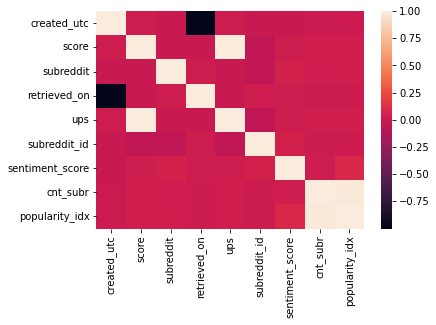

In [277]:
sns.heatmap(train_set.corr(method='spearman'))
train_set.corr(method='spearman')

,created_utc,score,subreddit,retrieved_on,ups,subreddit_id,sentiment_score,cnt_subr,popularity_idx
created_utc,1.000000,0.014937,-0.041046,-0.999997,0.014937,-0.034961,-0.034236,-0.030107,-0.048255
score,0.014937,1.000000,-0.010826,-0.014947,1.000000,-0.025078,-0.101378,0.056691,0.055632
subreddit,-0.041046,-0.010826,1.000000,0.041141,-0.010826,-0.118348,-0.073085,0.042499,0.020657
retrieved_on,-0.999997,-0.014947,0.041141,1.000000,-0.014947,0.035127,0.034083,0.029970,0.048128
ups,0.014937,1.000000,-0.010826,-0.014947,1.000000,-0.025078,-0.101378,0.056691,0.055632
subreddit_id,-0.034961,-0.025078,-0.118348,0.035127,-0.025078,1.000000,0.090645,-0.000358,0.018125
sentiment_score,-0.034236,-0.101378,-0.073085,0.034083,-0.101378,0.090645,1.000000,0.070210,0.181233
cnt_subr,-0.030107,0.056691,0.042499,0.029970,0.056691,-0.000358,0.070210,1.000000,0.936596
popularity_idx,-0.048255,0.055632,0.020657,0.048128,0.055632,0.018125,0.181233,0.936596,1.000000


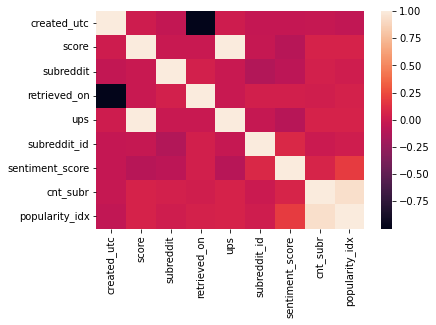

In [278]:
sns.heatmap(test_set.corr(method='spearman'))
test_set.corr(method='spearman')

In [279]:
train_set.describe()

,created_utc,score,subreddit,retrieved_on,ups,subreddit_id,sentiment_score,cnt_subr,popularity_idx
count,5.228000e+03,5228.000000,5228.000000,5.228000e+03,5228.000000,5228.000000,5228.000000,5228.000000,5228.000000
mean,1.420078e+09,4.924445,3037.638103,1.425123e+09,4.924445,2011.582058,0.091152,23.558914,23.742382
std,4.839445e+03,39.442968,1896.439284,8.781131e+02,39.442968,1838.382125,0.279964,183.517026,183.518448
min,1.420070e+09,-46.000000,6.000000,1.425121e+09,-46.000000,4.000000,-1.000000,1.000000,1.000000
25%,1.420074e+09,1.000000,1164.000000,1.425122e+09,1.000000,411.000000,0.000000,1.000000,1.291369
50%,1.420078e+09,1.000000,3316.000000,1.425123e+09,1.000000,1595.000000,0.000000,3.000000,3.000000
75%,1.420083e+09,3.000000,4759.000000,1.425124e+09,3.000000,3469.000000,0.218339,9.000000,9.000000
max,1.420087e+09,1530.000000,5993.000000,1.425124e+09,1530.000000,5995.000000,1.000000,9852.000000,9852.312500


## OvO Classifier

In [291]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

clf = OneVsOneClassifier(
    LinearSVC(random_state=0)).fit(test_set[['popularity_idx', 'cnt_subr']], test_set['score'])
pred = clf.predict(test_set[['score', 'ups']])
pred

array([ 1., 40.,  1.,  1.,  1., 40.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., 40., 40.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 40., 40.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 40.,
        1.,  1.,  1., 40.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 40.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., 40.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 40.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  7.,  1., 20.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., 20.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 40.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

# Linear Regression

In [292]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_set[['popularity_idx', 'cnt_subr']], train_set['score'])
reg.score(test_set[['popularity_idx', 'cnt_subr']], test_set['score'])
reg.coef_
reg.intercept_
pred_val = reg.predict(test_set[['popularity_idx', 'cnt_subr']])


In [293]:
pred_val

array([5.26499617, 5.26457574, 5.26457574, 4.72323016, 4.98295636,
       5.15557033, 3.82140794, 4.13719287, 4.63342632, 4.3623331 ,
       3.79885187, 3.45840874, 5.23032122, 5.26499617, 5.26457574,
       4.36275353, 5.26457574, 3.73118368, 4.87653059, 3.64053898,
       5.14196308, 4.61660148, 5.26499617, 5.26205318, 5.08412722,
       4.97627853, 4.3623331 , 5.08328636, 5.26415532, 5.03943551,
       4.63342632, 5.26499617, 5.23993388, 4.92665518, 5.18458077,
       4.54320206, 4.99348252, 5.06030986, 3.46051088, 5.23492142,
       5.26499617, 5.26457574, 5.26499617, 4.13719287, 5.03943551,
       5.08412722, 4.60676915, 5.26415532, 5.26499617, 5.25868975,
       5.26457574, 4.50372894, 5.20828378, 4.90409911, 5.26457574,
       4.92214397, 5.26457574, 4.70025366, 5.26079189, 5.26499617,
       5.26499617, 4.58747333, 4.72280973, 4.54278163, 5.26415532,
       4.41914369, 5.03124577, 4.45171651, 5.25658761, 5.26457574,
       4.69357583, 5.26499617, 5.03943551, 5.09582568, 4.78573

In [283]:
expected = test_set['score'].to_numpy()
expected

array([  4.,  -2.,   1.,   4.,   1.,  -5.,   1.,   1.,   2.,   3.,   4.,
         2.,   0.,   1.,   1.,   1.,   4.,   5.,   1.,  11.,   0.,   2.,
         0.,   1.,   0.,   1.,   1.,  10., -11., -11.,   5.,   2.,   1.,
         1.,   1.,   3.,   5.,   4.,  27.,   1.,   3.,   7.,   5.,   2.,
         1.,   2.,   3.,   1.,   2.,   1.,   2.,   1.,   2.,   1.,   1.,
         5.,   1.,   5.,   2.,   4.,   2.,  -7.,  -2.,   1.,   5.,   1.,
         1.,   6.,   3.,   1.,   1.,   1.,   2.,   6.,   1.,   6.,   1.,
        -1.,   1.,   5.,   1., -17.,   1.,   7.,   2.,   1.,   8.,   1.,
         1.,   1.,  -6.,   4.,   2.,   2.,   3.,   1.,   1.,   3.,   2.,
         2.,   1.,   1.,   3.,   1.,  15.,   1.,   1.,   1.,   2.,   1.,
        -1.,   1.,   2.,   1.,   1.,   3.,   1.,   5.,   3.,   1.,   2.,
         3.,   0.,   1.,  11.,  -4.,   1.,   1.,   0.,   1.,   0.,   1.,
         2.,   1.,   1.,   0.,   8.,   1.,   2.,  26.,   1.,  36.,   1.,
         1.,   3.,   1.,   1.,   2.,   1.,   0.,  5

# Confusion Matrix

In [294]:
from sklearn.metrics import confusion_matrix

x = test_set['popularity_idx'].astype('int64')
y = test_set['score'].astype('int64')
confusion_matrix(x, y)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# ROC Curve

In [295]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(x, y, pos_label=2)
fpr

tpr

thresholds

array([ 54,  53,  36,  27,  15,  14,  11,   8,   7,   6,   5,   4,   3,
         2,   1,   0,  -1,  -2,  -3,  -4,  -5,  -6,  -7, -11, -17])

## Randomized Search CV

In [296]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=1),
                     penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=0)
clf.n_splits_ = 1
search = clf.fit(test_set[['popularity_idx', 'ups']], test_set['score'])
search.best_score_

0.43159183673469387

# Using Ensemble of Methods

In [322]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)
bagging.fit(train_set[['popularity_idx', 'ups']], train_set['score'])
bagging.predict(test_set[['popularity_idx', 'ups']])

array([  4.,  -2.,   1.,   4.,   1.,  -5.,   1.,   1.,   2.,   3.,   4.,
         2.,   0.,   1.,   1.,   1.,   4.,   5.,   1.,  11.,   0.,   2.,
         0.,   1.,   0.,   1.,   1.,  10.,   1., -11.,   5.,   2.,   1.,
         1.,   1.,   1.,   5.,   4.,   1.,   1.,   3.,   7.,   5.,   2.,
         1.,   2.,   3.,   1.,   2.,   1.,   2.,   1.,   2.,   1.,   1.,
         5.,   1.,   5.,   2.,   4.,   2.,  -7.,  -2.,   1.,   5.,   1.,
         1.,   1.,   3.,   1.,   1.,   1.,   2.,   6.,   1.,   6.,   1.,
        -1.,   1.,   5.,   1.,   1.,   1.,   7.,   2.,   1.,   8.,   1.,
         1.,   1.,  -6.,   4.,   2.,   2.,   1.,   1.,   1.,   3.,   2.,
         2.,   1.,   1.,   3.,   1.,  15.,   1.,   1.,   1.,   2.,   1.,
        -1.,   1.,   2.,   1.,   1.,   3.,   1.,   5.,   3.,   1.,   2.,
         3.,   0.,   1.,  11.,  -4.,   1.,   1.,   0.,   1.,   0.,   1.,
         2.,   1.,   1.,   0.,   8.,   1.,   2.,   1.,   1.,   2.,   1.,
         1.,   3.,   1.,   1.,   2.,   1.,   0.,   

In [316]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=0.25, 
    random_state=0)
scores = cross_val_score(clf, test_set[['popularity_idx', 'ups']], test_set['score'], error_score="raise")
print(scores.mean())                             


clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=0.10, random_state=0)
scores = cross_val_score(clf, test_set[['popularity_idx', 'ups']], test_set['score'])
print(scores.mean())                                  


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=0.0005, random_state=0)
scores = cross_val_score(clf, test_set[['popularity_idx', 'ups']], test_set['score'])
print(scores.mean() > 0.99)         

0.7703673469387755
0.7906122448979591
False


In [323]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier


X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(train_set[['popularity_idx', 'ups']], train_set['score'])
clf.score(test_set[['popularity_idx', 'ups']], test_set['score'])    

0.9959677419354839

In [324]:
mean_squared_error(test_set['score'], clf.predict(test_set[['popularity_idx', 'ups']]))    

0.004032258064516129